# Investing in an index fund is often a better bet than buying a home

For most people, the two main ways to build wealth are to buy a home or to invest in the stock market. How do you decide which approach to take for yourself? Can you find an optimal way to do both such as paying a mortgage while also putting money into a 401k? The answer is ultimately a personal decision based on your risk tolerance as well as details that are specific to your situation such as the mortgage rate available to you, the company match for investing in the 401k, your tax bracket, and the list goes on. Notably, a major factor in deciding to buy a home is location. As we will see below, homes in some states have appreciated in value far more than other states. In this notebook, I will use house price data from [St. Louis Fred](https://fred.stlouisfed.org/) to address the questions below.

1. Exploratory data analysis of the S&P 500 index and housing prices of all 50 states. What are the historical trends?
2. How often has the S&P outcompeted the majority of housing markets?
3. Which states are least correlated with the S&P 500 and are therefore subject to less risk?

## Section 1: Exploratory data analysis

In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import yfinance as yf

from sklearn import linear_model

from modules import data_processing

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="ticks", font_scale=1.4, palette="colorblind")

In [2]:
# load data
data_dir = os.path.join(os.path.dirname(''), 'data')

SP500_df = yf.download("^GSPC", start="1980-01-01", progress=False, interval="3mo")['Close']

# load data from all states. dates are the first day of each quarter
states_HPI = data_processing.load_state_data(data_dir)

# join all data on date index
df = SP500_df.join(states_HPI, how='inner').rename(columns={'^GSPC':'S&P 500'})

# normalize to earliest date
df = df / df.iloc[0,:]
df.info()

C:\Users\frank\AppData\Local\Temp\ipykernel_12936\4264398043.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  SP500_df = yf.download("^GSPC", start="1980-01-01", progress=False, interval="3mo")['Close']


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 1985-01-01 to 2025-04-01
Data columns (total 52 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  162 non-null    float64
 1   AL       162 non-null    float64
 2   AK       162 non-null    float64
 3   AZ       162 non-null    float64
 4   AR       162 non-null    float64
 5   CA       162 non-null    float64
 6   CO       162 non-null    float64
 7   CT       162 non-null    float64
 8   DE       162 non-null    float64
 9   DC       162 non-null    float64
 10  FL       162 non-null    float64
 11  GA       162 non-null    float64
 12  HI       162 non-null    float64
 13  ID       162 non-null    float64
 14  IL       162 non-null    float64
 15  IN       162 non-null    float64
 16  IA       162 non-null    float64
 17  KS       162 non-null    float64
 18  KY       162 non-null    float64
 19  LA       162 non-null    float64
 20  ME       162 non-null    float64
 2

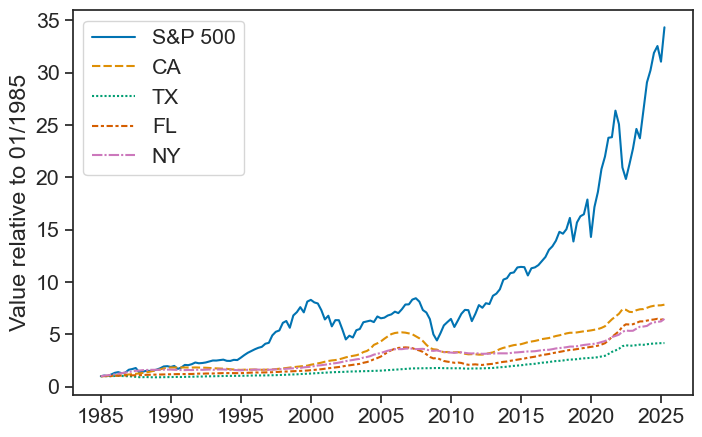

In [3]:
# show 4 largest states in population
plt.figure(figsize=(8,5))
sns.lineplot(data=df[['S&P 500','CA','TX','FL','NY']])
plt.ylabel(f'Value relative to {df.index.min().strftime("%m/%Y")}')
plt.show()

## Trends: high risk, high reward
- Compared to the house price indices, the stock market index, S&P 500, has experienced the greatest growth and also the largest downturns such as the early 2000s and 2008-2009. In other words, there is greater risk in the stock market, but over periods of 30 years or longer, the stock market tends to increase. 
- Generally, the house prices for California, Texas, Florida, and New York have tended to increase over the last 40 years, but their growth is quite small compared to the S&P 500. 
- California, Florida, and New York house prices dipped in 2008 just like the stock market. Of these housing markets, Texas is the only one that was insulated from the recession. We can use our data set to determine which other states were unaffected by the 2008 recession as well as by other down turns in the past. Texas and those other states would be a way to mitigate risk.

#### Why use the S&P 500 index?
I use the S&P500 index as the method for stock investing because it is arguably the most effective strategy on time scales of decades or longer. For a detailed explanation, read _The Little Book of Common Sense Investing_ by John Bogle. Additionally, this index fund is very easy to use in a practical sense because many mutual funds and exchange-traded funds track this index and are readily available for any person to buy shares. For example, anyone can buy shares of Schwab S&P 500 Index Fund (SWPPX) or Vanguard S&P 500 ETF (VOO) (or other examples). By purchasing a share of SWPPX or VOO, you are effectively invested in all 500 of the most successful US companies. For a broad overview of index fund investing, I recommend _The Simple Path to Wealth_ by JL Collins.

## Section 2: An equity index fund usually has a better return than real estate
If we simply compare the total return, the S&P 500 index fund will outperform a home during most time periods. As an example we can view the period from 1997 to 2017. The charts below show the average annual change in value for the best and worst performers of the period.

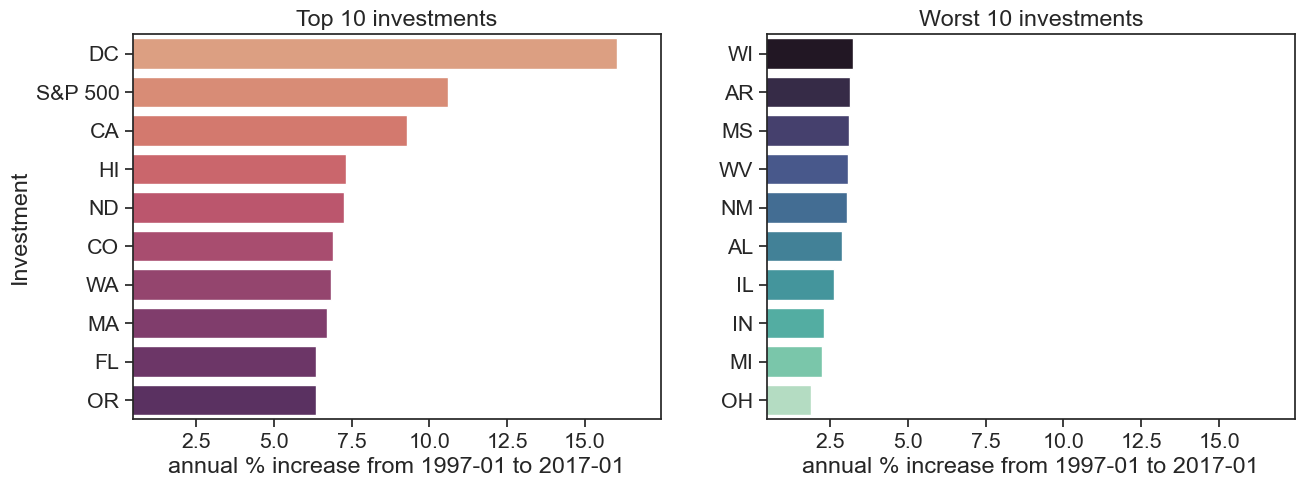

In [4]:
#choose the last date that's available
start_date = datetime(1997,1,1)
final_date = start_date.replace(year=start_date.year+20)
example1 = data_processing.total_return(df, start_date, final_date)

#show these changes in a bar plot
def plot_best_and_worst(for_plot, start_date, final_date):
    fig, ax=plt.subplots(1,2,figsize=(15,5))
    for_xaxis='annual % increase from '+start_date.strftime('%Y-%m')+' to '+final_date.strftime('%Y-%m')
    delta = (for_plot.max()-for_plot.min())*0.1
    xlim = (for_plot.min()-delta, for_plot.max()+delta)
    # only show the top 10
    sns.barplot(x=for_plot[:10], y=for_plot[:10].index, ax=ax[0], orient='h', 
                palette='flare', hue=for_plot[:10].index, legend=False)
    ax[0].set_title('Top 10 investments')
    ax[0].set_xlabel(for_xaxis)
    ax[0].set_xlim(xlim)
    ax[0].set_ylabel('Investment')
    sns.barplot(x=for_plot[-10:], y=for_plot[-10:].index, ax=ax[1], orient='h', 
                palette='mako', hue=for_plot[-10:].index, legend=False)
    ax[1].set_title('Worst 10 investments')
    ax[1].set_xlabel(for_xaxis)
    ax[1].set_xlim(xlim)
    ax[1].set_ylabel('')
    plt.show()
    

plot_best_and_worst(example1, start_date, final_date)

On the other hand, the S&P 500 index can perform much worse than a home depending on the year. For example, for the period 1999-2009, the S&P 500 gave a loss when all other house price indices maintained a positive return.

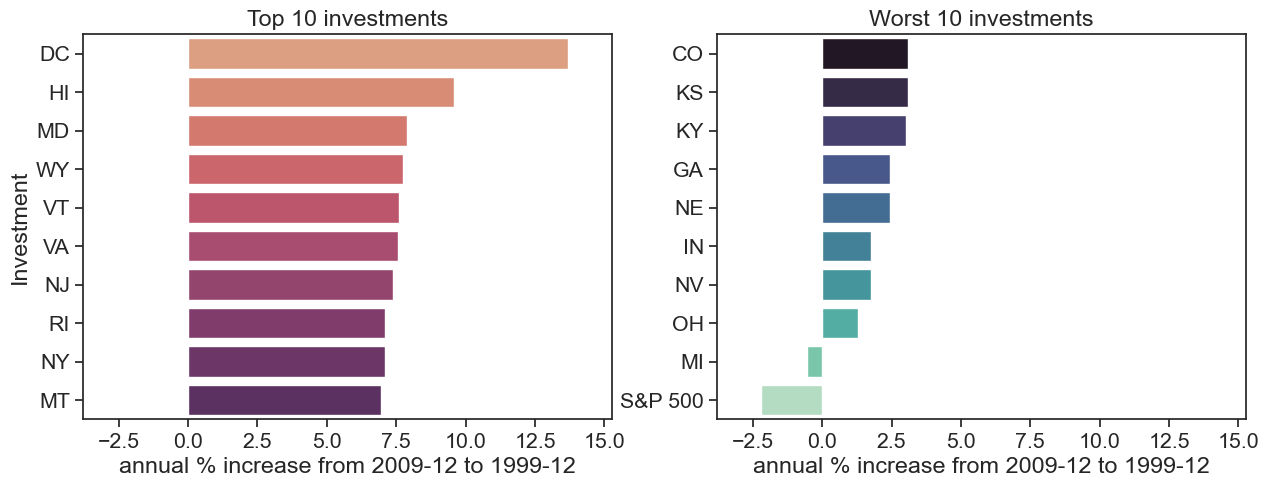

In [5]:
final_date = datetime(1999, 12, 1)
start_date = datetime(2009, 12, 1)
example2 = data_processing.total_return(df, start_date, final_date)
plot_best_and_worst(example2, start_date, final_date)

## Section 3: How often has the S&P outcompeted the majority of housing markets?
Let's assume the investment period is 10 years because homeowners tend to sell a house 10 years after purchasing it, according to the National Association of Realtors.

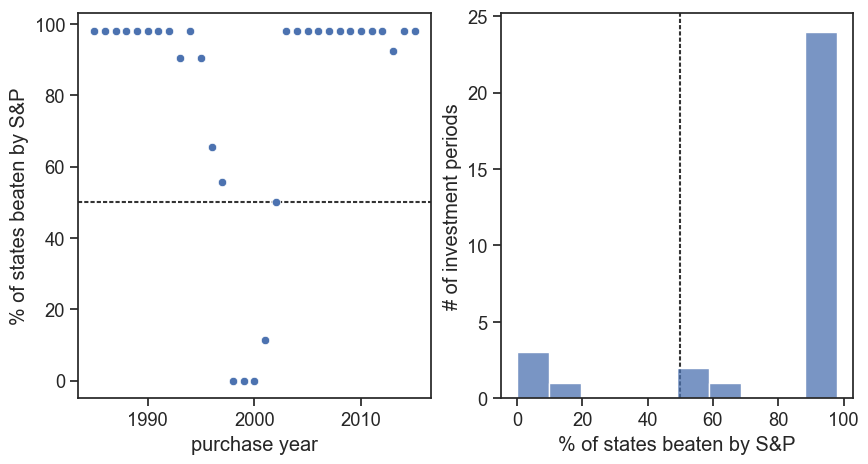

In [6]:
# generate a list of 10 year periods, with an increment of 1 year
period = 10
last_potential_year = df.index.max().year
start_yrs = np.arange(df.index.min().year, last_potential_year - period + 1)
stop_yrs = start_yrs + period
proportion = []
#calculate the returns for each window
for i in range(len(start_yrs)):
    changes = data_processing.total_return(
        df, 
        f'{start_yrs[i]}-01-01', 
        f'{stop_yrs[i]}-01-01'
    )
    #calculate the proportion of rows less than the index fund
    proportion.append(np.mean(changes<changes['S&P 500']))

performance=pd.DataFrame({
    'start_year': start_yrs,
    'stop_year': stop_yrs,
    'percent': np.array(proportion)*100,
})
performance['period']=period
sns.set_theme(style='ticks', font_scale=1.2)
fig, ax= plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=performance, x='start_year', y='percent',
              ax=ax[0])
#horizontal line at 50
ax[0].axhline(y=50, color='.2', dashes=(2,1), zorder=0) 
ax[0].set_xlabel('purchase year')
ax[0].set_ylabel('% of states beaten by S&P')
sns.histplot(x=performance['percent'], bins=10, ax=ax[1])
#vertical line at 50
ax[1].axvline(x=50, color='.2', dashes=(2,1), zorder=0)
ax[1].set_xlabel('% of states beaten by S&P')
ax[1].set_ylabel('# of investment periods')
plt.show()

In [7]:
print(f"Proportion of periods where real estate outperformed S&P 500: {np.mean(performance['percent']>50):.1%}")

Proportion of periods where real estate outperformed S&P 500: 83.9%


The graph on the left shows the percent of states that gave a lower return on investment compared to the S&P 500 as a function of the purchase year. This result is also visually apparent in the histogram, which shows the number of investment periods where the S&P 500 beat specific percentages of the states. 

## Section 4: Which states are least correlated with the S&P 500 and are therefore subject to less risk?
There is risk associated with any investment and those risks are not necessarily the same for real estate and index funds. Naturally, you might think that if you buy home it will not exposed to the same risks that the stock market is exposed to. But does the data support this hypothesis?

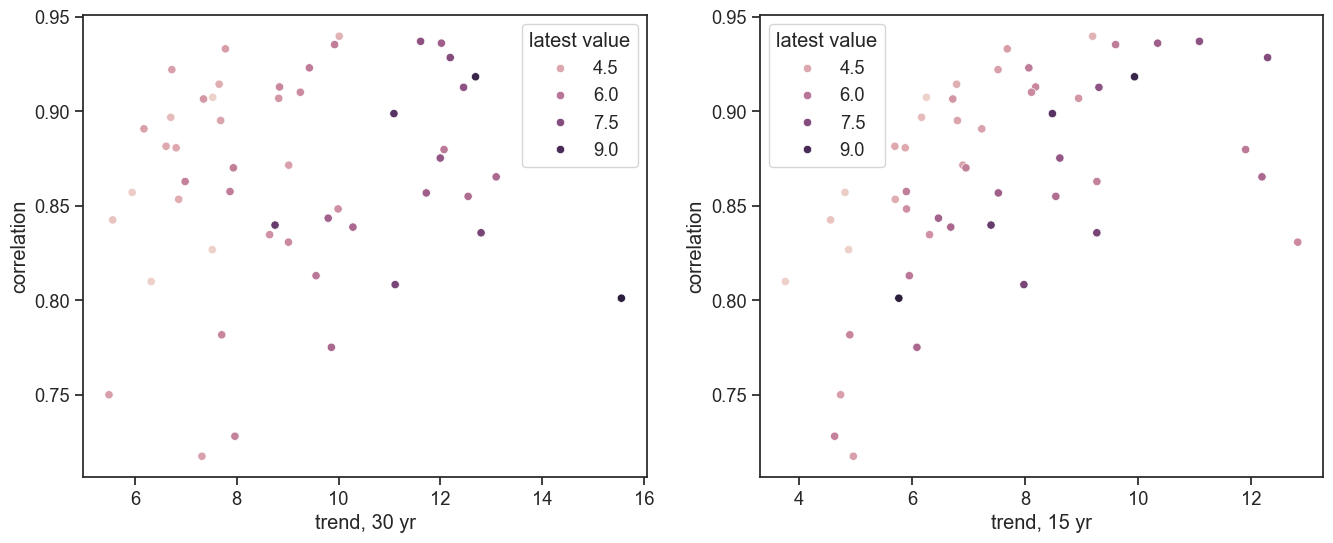

In [8]:
#identify which states are least correlated with the stock market
model = linear_model.LinearRegression()
coeff=[]
r_squared=[]
# for all housing indices
for state in states_HPI.columns:
    #run linear regression against the S&P500 
    model.fit(df[state].values.reshape(-1,1),df['S&P 500'])
    coeff.append(model.coef_[0])
    r_squared.append(model.score(df[state].values.reshape(-1,1),df['S&P 500']))

state_metrics = pd.DataFrame(
    {'beta': coeff,
     'correlation': r_squared,
     'latest value': df.iloc[-1,1:]
    },index=states_HPI.columns)
#calculate the average change in the last 30 years
#choose the last date that's available
final_date = df.index[-1]
start_date = final_date.replace(year=final_date.year-30) #subtract 30 years
state_metrics['trend, 30 yr'] = data_processing.total_return(df.drop('S&P 500',axis=1), start_date, final_date)
start_date = final_date.replace(year=final_date.year-15) #substract 15 years
state_metrics['trend, 15 yr'] = data_processing.total_return(df.drop('S&P 500',axis=1), start_date, final_date)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(data=state_metrics, x='trend, 30 yr', y='correlation', 
            hue='latest value', ax=ax[0])
sns.scatterplot(data=state_metrics, x='trend, 15 yr', y='correlation',
           hue='latest value', ax=ax[1])
plt.show()

In [9]:
#what are the top 3 states with R squared at 0.75 or less?
state_metrics.loc[state_metrics['correlation']<0.75,'trend, 15 yr'].sort_values(ascending=False)[:3]

CT    4.961624
MD    4.631007
Name: trend, 15 yr, dtype: float64

In general, most states that performed in the past few decades are correlated with the S&P 500. Broad index funds and homes are generally rise in value along with inflation.

# If you can stomach risk, invest in an index fund, not a home
The decision to buy a home is often based on heuristics such as "Real estate is less risky than a mutual fund" or "Renting is just throwing away money instead of building wealth." Although these ideas have merit, the truth is that home prices in 2025 are very high, which means a mortgage payment (along with taxes and potentially home owners insurance) is a huge amount of money and you could likely find cheaper rent. The money you save by renting could be better used as a nest egg that grows in the stock market through an index fund. Even if you are in a situation where a mortage would be equal to the rent you're willing to pay, the analysis in sections 2 and 3 indicates that the returns are often better for an equities index than a home.

Additionally, the analysis in section 4 indicates that you do not automatically diversify your investment portfolio by putting some of your money toward a home and some of it into an index fund. Depending on your location, these assets are strongly correlated. If your goal is to mitigate risk, look specifically for those locations where the home price has not been historically correlated with the an index fund.
